<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## GeostatsPy Well-documented Demonstration Workflows 

### Permissible Variogram Models

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

This is a tutorial for / demonstration of **Permissible Variogram Models**. 

**YouTube Lecture**: check out my lecture on [Variogram Modeling](https://youtu.be/-Bi63Y3u6TU?si=-kwvFLicNTbg85xL).

#### Variogram Models

Here I provide visualizations with the functions for the common positive definite variogram models. I variogram model inferred to represent spatial continuity from the variogram.

##### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

##### The Variogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

\begin{equation}
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
\end{equation}

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

Note the correlogram is related to the covariance function as:

\begin{equation}
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
\end{equation}

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

\begin{equation}
-1.0 \le \rho_x(\bf{h}) \le 1.0
\end{equation}

##### Variogram Observations

The following are common observations for variograms that should assist with their practical use.

###### Observation \#1 - As distance increases, variability increase (in general).

This is common since in general, over greater distance offsets, there is often more difference between the head and tail samples.

In some cases, such as with spatial cyclicity of the hole effect variogram model the variogram may have negative slope over somelag distance intervals

Negative slopes at lag distances greater than half the data extent are often caused by too few pairs for a reliable variogram calculation

###### Observation \#2 - Calculated with over all possible pairs separated by lag vector, $\bf{𝐡}$.

We scan through the entire data set, searching for all possible pair combinations with all other data.  We then calculate the variogram as one half the expectation of squared difference between all pairs.

More pairs results in a more reliable measure.

###### Observation \#3 - Need to plot the sill to know the degree of correlation.

**Sill** is the variance, $\sigma^2_x$

Given stationarity of the variance, $\sigma^2_x$, and variogram $\gamma(\bf{h})$:

we can define the covariance function:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

The covariance measure is a measure of similarity over distance (the mirror image of the variogram as shown by the equation above).

Given a standardized distribution $\sigma^2_x = 1.0$, the covariance, $C_x(\bf{h})$, is equal to the correlogram, $\rho_x(\bf{h})$: 

\begin{equation}
\rho_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

###### Observation \#4 - The lag distance at which the variogram reaches the sill is know as the range.

At the range, knowing the data value at the tail location provides no information about a value at the head location of the lag distance vector.

###### Observation \#5 - The nugget effect, a discontinuity at the origin

Sometimes there is a discontinuity in the variogram at distances less than the minimum data spacing.  This is known as **nugget effect**.

The ratio of nugget / sill, is known as relative nugget effect (%). Modeled as a discontinuity with no correlation structure that at lags, $h \gt \epsilon$, an infinitesimal lag distance, and perfect correlation at $\bf{h} = 0$.
Caution when including nuggect effect in the variogram model as measurement error, mixing populations cause apparent nugget effect

This exercise demonstrates the semivariogram calculation with GeostatsPy. The steps include:

1. generate a 2D model with sequential Gaussian simulation
2. sample from the simulation
3. calculate and visualize experimental semivariograms

#### Detecting Directions of Continuity

Spatial continuity can be described with nested spatial continuity models:

\begin{equation}
\Gamma_x(\bf{h}) = \sum_{i=1}^{nst} \gamma_i(\bf{h})
\end{equation}

where $\Gamma_x(\bf{h})$ is the nested variogram model resulting from the summation of $nst$ nested variograms  $\gamma_i(\bf{h})$.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.  In 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$. Note, the range in the minor direction (orthogonal to the major direction.

The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes alligned with and set to the major and minor for the variogram.

\begin{equation}
\bf{h}_i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
\end{equation}

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested componnent of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

In this workflow we will observe the common permissible variogram models in GeostatsPy.  

* for all we assume a contribution of the sill (single structure) and the sill is 1.0 (standardized feature).

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))  

GeostatsPy version: 0.0.52


We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrys for gridded data
import pandas as pd                                           # DataFrames for tabular data
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

#### Define Functions

This is a convenience function to add major and minor gridlines to improve plot interpretability.

In [3]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### List of Lag Distances

We define a list of lag distances for our variogram models.

In [4]:
h = np.linspace(0,100,101)                                    # lag distance vector

#### Nugget Effect Variogram Model

No spatial correlation

* Does not have a range, nor directionality, i.e., acts over all distances and directions.

Should be a small component of the overall variance
* Very uncommon in siliclastic sedimentary systems
* More common for mineral grades in mining
* May be measurement error

The equation:

\begin{equation}
\gamma(\bf{h} ) = c_1 \cdot \text{Nugget} =
\left\{ 
  \begin{array}{ c l }
    0 & h = 0 \\
    c_1 & h > 0
  \end{array}
\right.
\end{equation}

where $𝑐_1$ is the contribution, and $h$ is the lag distance

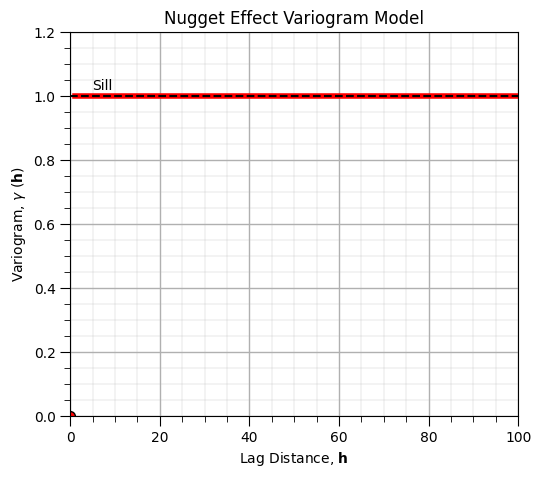

In [5]:
gamma_nugget = np.ones(101)                                   # nugget effect
gamma_nugget[0] = 0

plt.subplot(111)
plot = plt.plot(h[1:],gamma_nugget[1:],color='red',lw=4)
plt.plot([0,100],[1.0,1.0],color='black',ls='--'); plt.annotate('Sill',[5,1.02])
plt.scatter(0,0,color='red',edgecolor='black',s=50)
gca = plt.gca()
plt.xlim([0,100]); plt.ylim([0,1.2])
plt.xlabel(r'Lag Distance, $\bf{h}$'); plt.ylabel(r'Variogram, $\gamma$ ($\bf{h}$)')
plt.title('Nugget Effect Variogram Model'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Spherical Variogram Model

A very commonly observed variogram / spatial continuity form in many settings

* Peicewise, beyond the range is equal to the sill

The equation:

\begin{equation}
\gamma(\bf{h} ) = c_1 \cdot \text{Sph} \left( \frac{\bf{h} }{a} \right) =
\left\{ 
  \begin{array}{ c l }
    c_1 \cdot \left[ 1.5 \left( \frac{\bf{h} }{a} \right) -  0.5 \left( \frac{\bf{h} }{a} \right)^3 \right] & h < a \\
    c_1 & h \ge a
  \end{array}
\right.
\end{equation}

where $𝑐_1$ is the contribution, $𝑎$ is the range and $\bf{𝐡}$ is the lag distance

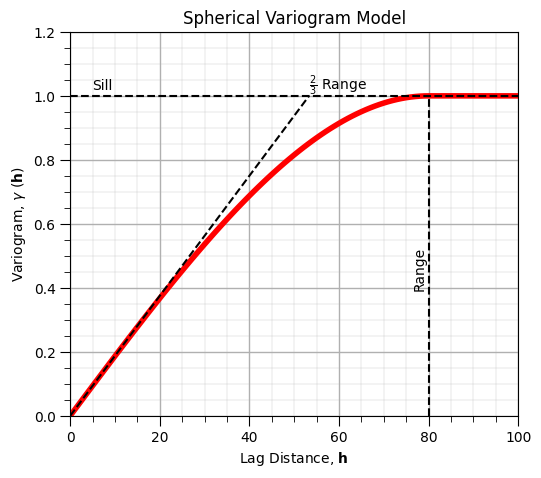

In [6]:
vrange = 80                                                   # range parameter

gamma_sph = 1.0*(1.5*h/vrange) - 0.5*np.power(h/vrange,3)     # spherical model
gamma_sph[h > vrange] = 1.0

plt.subplot(111)
plot = plt.plot(h,gamma_sph,color='red',lw=4)
plt.plot([0,100],[1.0,1.0],color='black',ls='--'); plt.annotate('Sill',[5,1.02])
plt.plot([0,vrange*2/3],[0,1.0],color='black',ls='--'); plt.annotate(r'$\frac{2}{3}$ Range',[vrange*2/3,1.02])
plt.plot([vrange,vrange],[0.0,1.0],color='black',ls='--'); plt.annotate('Range',[vrange-3.5,0.4],rotation=90.0)
gca = plt.gca()
plt.xlim([0,100]); plt.ylim([0,1.2])
plt.xlabel(r'Lag Distance, $\bf{h}$'); plt.ylabel(r'Variogram, $\gamma$ ($\bf{h}$)')
plt.title('Spherical Variogram Model'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Exponential Variogram Model

Also very commonly observed variogram / spatial continuity form

* Less short-scale continuity than spherical, and reaches sill asymptotically, range is at 95% of the sill 

The equation:

\begin{equation}
\gamma( \bf{h} ) = c_1 \cdot \text{ Exp } \left( \frac{ \bf{h} }{𝑎} \right) = c_1 \cdot \left[ 1.0 − \text{exp} \left(−3 \cdot \left( \frac{ \bf{h} }{𝑎} \right) \right) \right]
\end{equation}

where $𝑐_1$ is the contribution, $𝑎$ is the range and $\bf{h}$ is the lag distance.

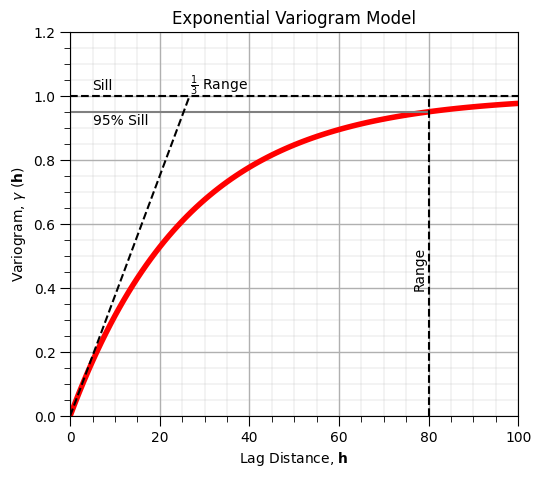

In [7]:
vrange = 80                                                   # range parameter

gamma_exp = 1.0*(1.0-np.exp(-3*(h/vrange)))                   # exponential model

plt.subplot(111)
plot = plt.plot(h,gamma_exp,color='red',lw=4)
plt.plot([0,100],[1.0,1.0],color='black',ls='--'); plt.annotate('Sill',[5,1.02])
plt.plot([0,vrange],[0.95,0.95],color='grey',ls='-'); plt.annotate('95% Sill',[5,0.91])
plt.plot([vrange,vrange],[0.0,1.0],color='black',ls='--'); plt.annotate('Range',[vrange-3.5,0.4],rotation=90.0)
plt.plot([0,vrange*1/3],[0,1.0],color='black',ls='--'); plt.annotate(r'$\frac{1}{3}$ Range',[vrange*1/3,1.02])
gca = plt.gca()
plt.xlim([0,100]); plt.ylim([0,1.2])
plt.xlabel(r'Lag Distance, $\bf{h}$'); plt.ylabel(r'Variogram, $\gamma$ ($\bf{h}$)')
plt.title('Exponential Variogram Model'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Gaussian Variogram Model

Less commonly observed variogram / spatial continuity form, e.g., for thickness and elevation

* Much more short-scale continuity than spherical, and reaches sill asymptotically, range is at 95% of the sill 

The equation:

\begin{equation}
\gamma( \bf{h} ) = c_1 \cdot \text{ Gaus } \left( \frac{ \bf{h} }{𝑎} \right) = c_1 \cdot \left[ 1.0 − \text{exp} \left(−3 \cdot \left( \frac{ \bf{h} }{𝑎} \right)^2 \right) \right]
\end{equation}

where $𝑐_1$ is the contribution, $𝑎$ is the range and $\bf{h}$ is the lag distance.

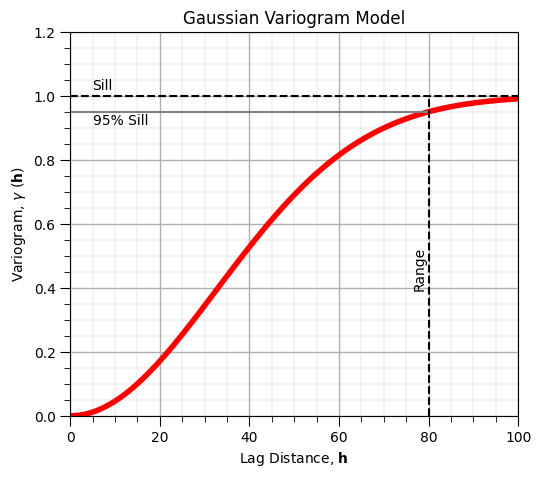

In [8]:
vrange = 80                                                   # range parameter

gamma_gaus = 1.0*(1.0-np.exp(-3*np.power(h/vrange,2)))        # Gaussian model

plt.subplot(111)
plot = plt.plot(h,gamma_gaus,color='red',lw=4)
plt.plot([0,100],[1.0,1.0],color='black',ls='--'); plt.annotate('Sill',[5,1.02])
plt.plot([0,vrange],[0.95,0.95],color='grey',ls='-'); plt.annotate('95% Sill',[5,0.91])
plt.plot([vrange,vrange],[0.0,1.0],color='black',ls='--'); plt.annotate('Range',[vrange-3.5,0.4],rotation=90.0)
gca = plt.gca()
plt.xlim([0,100]); plt.ylim([0,1.2])
plt.xlabel(r'Lag Distance, $\bf{h}$'); plt.ylabel(r'Variogram, $\gamma$ ($\bf{h}$)')
plt.title('Gaussian Variogram Model'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was a basic demonstration of permissible variogram models to support 3D model construction. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  